In [52]:
from fonctions import *

In [53]:
# récupération des articles et des tags

dic_tags_nltk = lire_json("articlesTags_nltk.json")

dic_tags_stanford = lire_json("articlesTags_Stanford.json")

new_dic = reorganiser_POS(dic_tags_stanford)

In [54]:
# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

print(liste_tags[:3])
print(liste_titres[:3])

[['NOUN', 'ADP', 'NUM', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADJ', 'ADP', 'NUM'], ['DET', 'NOUN', 'DET', 'NOUN', 'PUNCT', 'PRON', 'ADV', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN'], ['NOUN', 'ADP', 'NOUN', 'PUNCT', 'DET', 'NOUN', 'PUNCT']]
['Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918', 'Les chantiers du Président : On ne peut cacher le soleil avec un tamis', 'Gueule de bois ? Quelques remèdes...']


In [55]:
import re

def get_liste_journaux(liste_chemins):
    liste_journaux = []

    for c in chemins_articles:
        j = re.findall("_(.+)_", c)
        liste_journaux.append(j[0])
    return liste_journaux
# création de la liste des noms de journaux correspondants aux articles

liste_journaux = []

for c in chemins_articles:
    j = re.findall("_(.+)_", c)
    liste_journaux.append(j[0])
    
print(len(set(liste_journaux)))

123


In [56]:
# Vectorisation des documents et création du model

X, V = creer_X(liste_tags, 4, 4)

model = creer_model_KM(7, X)

predictions = model.predict(X)

print(predictions[:100])
print(effectifs_clusters(model))

[2 2 6 1 1 1 1 4 6 3 1 2 1 4 1 1 1 0 4 4 6 6 1 1 1 1 1 5 1 4 5 0 4 2 1 0 1
 1 1 1 1 1 5 1 3 1 1 1 2 5 1 1 6 6 1 1 0 6 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0
 4 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 6 1 1 1 1 4 6 2 2]
{2: 463, 6: 671, 1: 3413, 4: 314, 3: 163, 0: 366, 5: 295}


In [57]:
# extraction de titres d'articles au hasard pour chaque cluster

dictionnaire = dic_complet(X, predictions, liste_tags, liste_titres, liste_journaux)

afficher_titres_hasard(2, dictionnaire)

Cluster 0 : 366 articles
Eco-Emballages a placé de l'argent dans des paradis fiscaux
PROPN AUX VERB ADP VERB ADP DET NOUN ADJ
lematin_CH
963 millions de personnes sous-alimentées dans le monde en 2008
NUM NOUN ADP NOUN VERB ADP DET NOUN ADP NUM
lematin_CH
----------
Cluster 1 : 3413 articles
Choléra : le Zimbabwe accuse Londres de "génocide"
NOUN PUNCT DET PROPN VERB PROPN ADP NUM NOUN PUNCT
lalsace
L'Europe entre tensions sociales et tentations protectionnistes
VERB ADP NOUN ADJ CCONJ NOUN ADJ
lalsace
----------
Cluster 2 : 463 articles
Présidentielle 2009 - Dynamique mouvement des pèlerins et deux associations politiques sollicitent la candidature officielle de Denis Sassou N'Guesso Prélude à l'annonce de la candidature du président de la République pour l'élection présidentielle de 2009, les mouvements associatifs réunis autour....
ADJ NUM PUNCT ADJ NOUN DET NOUN CCONJ NUM NOUN ADJ VERB DET NOUN ADJ ADP PROPN PROPN PROPN PROPN ADP NOUN ADP DET NOUN DET NOUN ADP DET NOUN ADP NOUN ADJ

In [58]:
# affichage des dimensions caractéristiques de chaque cluster
        
dimensions_clusters(model, V)

Cluster 0:
(VERB ADP DET NOUN) | (NOUN VERB ADP DET) | (ADP DET NOUN ADP) | (PROPN VERB ADP DET) | (ADP DET NOUN ADJ) | (DET NOUN VERB ADP) | (ADJ VERB ADP DET) | (ADP NOUN VERB ADP) | (DET NOUN ADP NOUN) | (NOUN ADP NOUN VERB) | 
----------
Cluster 1:
(DET NOUN ADP PROPN) | (DET NOUN DET NOUN) | (DET NOUN ADP NOUN) | (NOUN ADP NOUN ADJ) | (NOUN ADP PROPN PROPN) | (ADP VERB DET NOUN) | (NOUN ADP DET NOUN) | (ADJ ADP DET NOUN) | (NUM NOUN ADP NOUN) | (PROPN ADP DET NOUN) | 
----------
Cluster 2:
(NOUN ADP DET NOUN) | (DET NOUN ADP DET) | (ADP DET NOUN ADP) | (ADP DET NOUN ADJ) | (VERB DET NOUN ADP) | (PUNCT DET NOUN ADP) | (PUNCT NOUN ADP DET) | (DET NOUN ADP NOUN) | (DET NOUN ADP PROPN) | (NOUN DET NOUN ADP) | 
----------
Cluster 3:
(NOUN VERB DET NOUN) | (DET NOUN VERB DET) | (PUNCT DET NOUN VERB) | (VERB DET NOUN ADP) | (VERB DET NOUN ADJ) | (PROPN PUNCT DET NOUN) | (NOUN PUNCT DET NOUN) | (DET NOUN DET NOUN) | (NOUN DET NOUN VERB) | (DET NOUN ADP NOUN) | 
----------
Cluster 4:
(NOUN

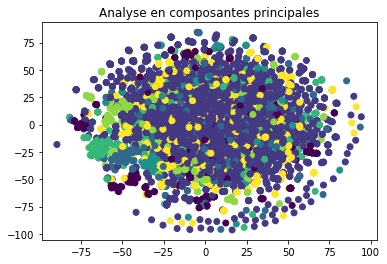

In [59]:
# Tracer l'analyse en composantes principales

tracer_ACP(X, predictions)

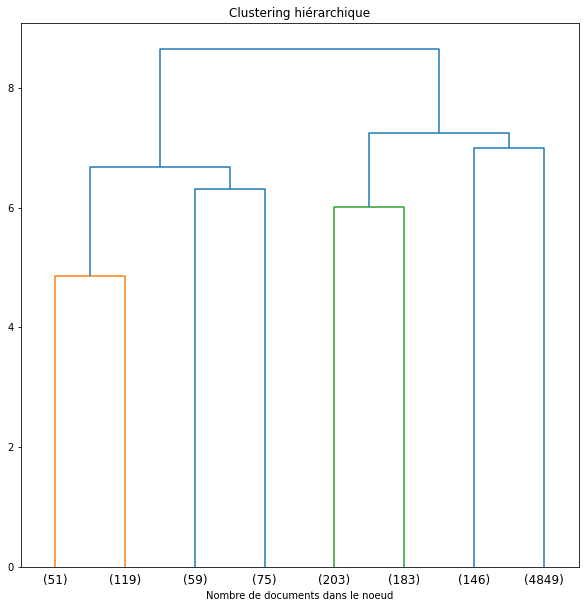

In [60]:
# Tracer le dendrogramme avec un clustering hiérarchique

model = AgglomerativeClustering(n_clusters=7, compute_distances=True)
model = model.fit(X)
tracer_dendrogram(model)

In [6]:
print(effectifs_clusters(model))

{1: 4387, 3: 535, 0: 534, 2: 229}


In [46]:
import nltk

nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or